In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [2]:
transactions = pd.read_csv('transactions.csv',index_col=[0])
transactions

,person,event,time,amount,gender,age,income,year joined,member_since(in years),gender_F,gender_M,gender_O,income bins,num_transactions
0,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,F,20,30000.0,2016,4,1,0,0,1,10
1,02c083884c7d45b39cc68e1314fec56c,transaction,6,1.44,F,20,30000.0,2016,4,1,0,0,1,10
2,02c083884c7d45b39cc68e1314fec56c,transaction,12,4.56,F,20,30000.0,2016,4,1,0,0,1,10
3,02c083884c7d45b39cc68e1314fec56c,transaction,84,1.53,F,20,30000.0,2016,4,1,0,0,1,10
4,02c083884c7d45b39cc68e1314fec56c,transaction,90,0.50,F,20,30000.0,2016,4,1,0,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123797,aabc3d56a2ea4446bef4c3f9eec8ab72,transaction,714,14.68,F,72,74000.0,2018,2,1,0,0,3,1
123798,448dabde725040978b8a247a20bac126,transaction,714,3.19,M,50,60000.0,2018,2,0,1,0,2,1
123799,7718656997f3453db0f5aeca9cd35240,transaction,714,15.35,F,73,65000.0,2018,2,1,0,0,3,1
123800,54463e5d95124b7fb3133fc1eae71952,transaction,714,0.76,M,42,69000.0,2017,3,0,1,0,3,1


In [3]:
transactions.corr()

,time,amount,age,income,year joined,member_since(in years),gender_F,gender_M,gender_O,income bins,num_transactions
time,1.000000,0.005504,0.005609,0.002995,0.004424,-0.004424,-0.001881,0.002871,-0.004148,0.001898,-0.038048
amount,0.005504,1.000000,0.091534,0.237077,0.030986,-0.030986,0.089521,-0.089739,0.002990,0.229147,-0.095568
age,0.005609,0.091534,1.000000,0.282583,0.011170,-0.011170,0.131003,-0.130201,-0.000272,0.274323,-0.167729
income,0.002995,0.237077,0.282583,1.000000,0.022724,-0.022724,0.195894,-0.193489,-0.005408,0.948328,-0.310059
year joined,0.004424,0.030986,0.011170,0.022724,1.000000,-1.000000,0.062068,-0.065728,0.016624,0.017823,-0.368564
member_since(in years),-0.004424,-0.030986,-0.011170,-0.022724,-1.000000,1.000000,-0.062068,0.065728,-0.016624,-0.017823,0.368564
gender_F,-0.001881,0.089521,0.131003,0.195894,0.062068,-0.062068,1.000000,-0.970770,-0.097906,0.187696,-0.093512
gender_M,0.002871,-0.089739,-0.130201,-0.193489,-0.065728,0.065728,-0.970770,1.000000,-0.143815,-0.186864,0.092432
gender_O,-0.004148,0.002990,-0.000272,-0.005408,0.016624,-0.016624,-0.097906,-0.143815,1.000000,0.000923,0.002298
income bins,0.001898,0.229147,0.274323,0.948328,0.017823,-0.017823,0.187696,-0.186864,0.000923,1.000000,-0.297617


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123802 entries, 0 to 123801
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   person                  123802 non-null  object 
 1   event                   123802 non-null  object 
 2   time                    123802 non-null  int64  
 3   amount                  123802 non-null  float64
 4   gender                  123802 non-null  object 
 5   age                     123802 non-null  int64  
 6   income                  123802 non-null  float64
 7   year joined             123802 non-null  int64  
 8   member_since(in years)  123802 non-null  int64  
 9   gender_F                123802 non-null  int64  
 10  gender_M                123802 non-null  int64  
 11  gender_O                123802 non-null  int64  
 12  income bins             123802 non-null  int64  
 13  num_transactions        123802 non-null  int64  
dtypes: float64(2), int64

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

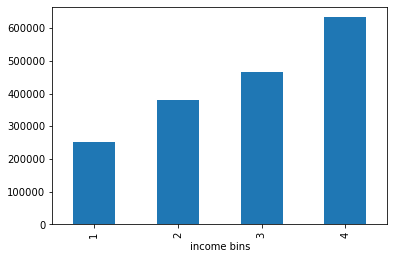

In [6]:
income_bins = transactions.groupby('income bins')['amount'].sum()
income_bins.plot(kind = 'bar') 

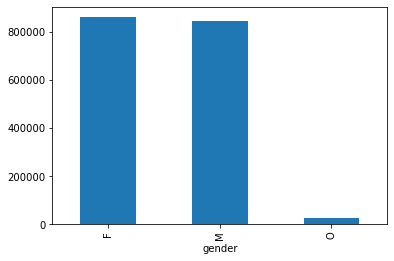

In [7]:
gender = transactions.groupby('gender')['amount'].sum()
gender.plot(kind='bar')

Male and female have almost spent equal amounts but other gender have spent less totally. 
We cannot conclude much from this observation as frequency of genders might be different. 

So it is rather better to check the mean of amount spent by each gender.

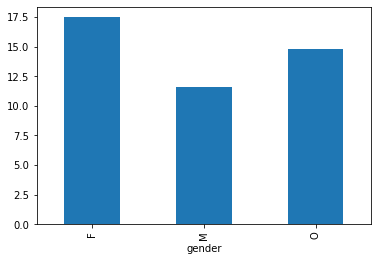

In [8]:
gender = transactions.groupby('gender')['amount'].mean()
gender.plot(kind='bar')
# We see that on an average females have spent less amount.

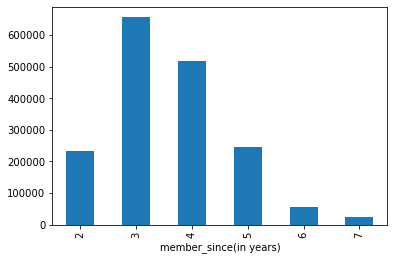

In [9]:
members_since = transactions.groupby('member_since(in years)')['amount'].sum()
members_since.plot(kind='bar')

# we can understand that new customers and old customers did not spend much.

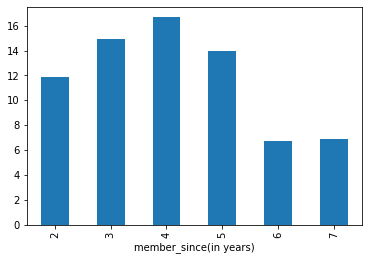

In [10]:
members_since = transactions.groupby('member_since(in years)')['amount'].mean()
members_since.plot(kind='bar')

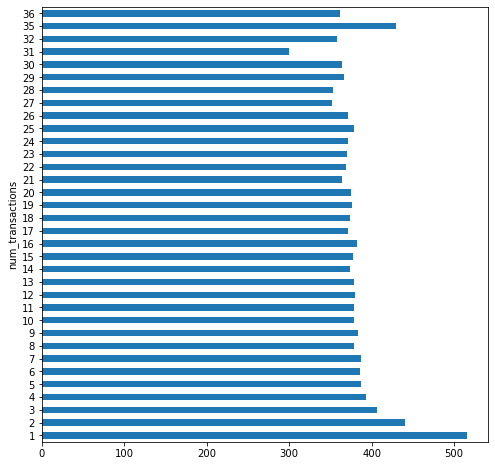

In [11]:
# Let's see if people with more number of transactions visit early or not.

mean_time = transactions.groupby('num_transactions')['time'].mean()
mean_time.plot(kind='barh',figsize=(8,8))

Does income effect spending ?

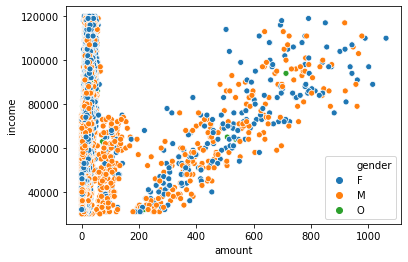

In [12]:
sns.scatterplot(x = 'amount',y = 'income',data=transactions,hue='gender')

In [13]:
transactions.set_index('person',inplace=True)
transactions.drop(['event','income bins'],axis=1,inplace=True)
transactions

,time,amount,gender,age,income,year joined,member_since(in years),gender_F,gender_M,gender_O,num_transactions
person,,,,,,,,,,,
02c083884c7d45b39cc68e1314fec56c,0,0.83,F,20,30000.0,2016,4,1,0,0,10
02c083884c7d45b39cc68e1314fec56c,6,1.44,F,20,30000.0,2016,4,1,0,0,10
02c083884c7d45b39cc68e1314fec56c,12,4.56,F,20,30000.0,2016,4,1,0,0,10
02c083884c7d45b39cc68e1314fec56c,84,1.53,F,20,30000.0,2016,4,1,0,0,10
02c083884c7d45b39cc68e1314fec56c,90,0.50,F,20,30000.0,2016,4,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...
aabc3d56a2ea4446bef4c3f9eec8ab72,714,14.68,F,72,74000.0,2018,2,1,0,0,1
448dabde725040978b8a247a20bac126,714,3.19,M,50,60000.0,2018,2,0,1,0,1
7718656997f3453db0f5aeca9cd35240,714,15.35,F,73,65000.0,2018,2,1,0,0,1


Which gender utilizes the offer more number of times?

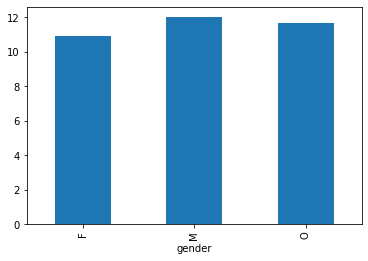

In [14]:
num_transactions = transactions.groupby('gender')['num_transactions'].mean()
num_transactions.plot(kind='bar')